# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


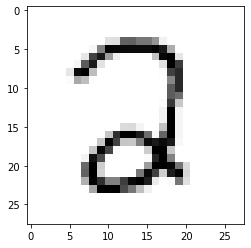

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24950176690989226
train accuracy is: 0.5813720580871307, test accuracy is 0.5665322580645161


Epoch 10 Loss 0.24645180467952688
train accuracy is: 0.7081455516608246, test accuracy is 0.6975806451612904


Epoch 20 Loss 0.22789266664190713
train accuracy is: 0.8370055082623936, test accuracy is 0.8361895161290323


Epoch 30 Loss 0.13840922004870573
train accuracy is: 0.8905858788182274, test accuracy is 0.9027217741935484


Epoch 40 Loss 0.0746531562420143
train accuracy is: 0.9230512435319647, test accuracy is 0.9359879032258065


Epoch 50 Loss 0.05438200525328886
train accuracy is: 0.9392421966282758, test accuracy is 0.952116935483871


Epoch 60 Loss 0.04485696505380546
train accuracy is: 0.9496745117676515, test accuracy is 0.9591733870967742


Epoch 70 Loss 0.03947159448576308
train accuracy is: 0.9545151059923218, test accuracy is 0.9647177419354839


Epoch 80 Loss 0.03604334906129451
train accuracy is: 0.9581872809213821, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.03363527547264694
train accuracy is: 0.9595226172592222, test accuracy is 0.967741935483871


Epoch 100 Loss 0.03181818808579663
train accuracy is: 0.9626105825404774, test accuracy is 0.967741935483871


Epoch 110 Loss 0.030371281597156016
train accuracy is: 0.9647805040894676, test accuracy is 0.9702620967741935


Epoch 120 Loss 0.02917338213645864
train accuracy is: 0.9658654648639626, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.028148217795884965
train accuracy is: 0.9665331330328827, test accuracy is 0.9707661290322581


Epoch 140 Loss 0.027257824463034305
train accuracy is: 0.9677015523284928, test accuracy is 0.9702620967741935


Epoch 150 Loss 0.02646095155917574
train accuracy is: 0.9686195960607578, test accuracy is 0.969758064516129


Epoch 160 Loss 0.02575203012667214
train accuracy is: 0.9696210983141379, test accuracy is 0.9702620967741935


Epoch 170 Loss 0.02510335861741966
train accuracy is: 0.9704556835252879, test accuracy is 0.9702620967741935


Epoch 180 Loss 0.02451366697797566
train accuracy is: 0.970956434651978, test accuracy is 0.9702620967741935


Epoch 190 Loss 0.02397133170386579
train accuracy is: 0.971290268736438, test accuracy is 0.9702620967741935


Epoch 200 Loss 0.023465199242328566
train accuracy is: 0.9721248539475881, test accuracy is 0.9692540322580645


Epoch 210 Loss 0.022991188592153346
train accuracy is: 0.9728759806376232, test accuracy is 0.9692540322580645


Epoch 220 Loss 0.02254332532872155
train accuracy is: 0.9737105658487731, test accuracy is 0.969758064516129


Epoch 230 Loss 0.02212022368638782
train accuracy is: 0.9741278584543482, test accuracy is 0.9702620967741935


Epoch 240 Loss 0.021719460517784808
train accuracy is: 0.9747955266232682, test accuracy is 0.9717741935483871


0.05692675463642467

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24381567732906534
train accuracy is: 0.6583208145551661, test accuracy is 0.6925403225806451


Epoch 10 Loss 0.10284592132931236
train accuracy is: 0.9098647971957937, test accuracy is 0.922883064516129


Epoch 20 Loss 0.07896387398704029
train accuracy is: 0.9272241695877149, test accuracy is 0.9410282258064516


Epoch 30 Loss 0.06802652262876407
train accuracy is: 0.9361542313470206, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.061476911126504906
train accuracy is: 0.9404106159238859, test accuracy is 0.9551411290322581


Epoch 50 Loss 0.057023841179672664
train accuracy is: 0.943748956768486, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.05375396272513072
train accuracy is: 0.9461692538808212, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.051228939647044405
train accuracy is: 0.9483391754298114, test accuracy is 0.9586693548387096


Epoch 80 Loss 0.04919995606323637
train accuracy is: 0.9496745117676515, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.04752783982039654
train accuracy is: 0.9506760140210315, test accuracy is 0.9611895161290323


Epoch 100 Loss 0.0461172954179286
train accuracy is: 0.9521782674011017, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.04490598176239333
train accuracy is: 0.9529293940911367, test accuracy is 0.9616935483870968


Epoch 120 Loss 0.043850705056381015
train accuracy is: 0.9540978133867468, test accuracy is 0.9616935483870968


Epoch 130 Loss 0.042921195581187656
train accuracy is: 0.9554331497245869, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.042093521238687204
train accuracy is: 0.956434651977967, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04135023603647436
train accuracy is: 0.957185778668002, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04067759519298128
train accuracy is: 0.958020363879152, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.04006358417917638
train accuracy is: 0.958604573526957, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03950340575145942
train accuracy is: 0.9585211150058421, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.03898639442489392
train accuracy is: 0.9591053246536472, test accuracy is 0.967741935483871


Epoch 200 Loss 0.03850854388422934
train accuracy is: 0.9592722416958771, test accuracy is 0.967741935483871


Epoch 210 Loss 0.03806473520694156
train accuracy is: 0.9595226172592222, test accuracy is 0.9672379032258065


Epoch 220 Loss 0.03765114740749394
train accuracy is: 0.9596895343014522, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03726396815931978
train accuracy is: 0.9598564513436821, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03690148674172278
train accuracy is: 0.9602737439492572, test accuracy is 0.9667338709677419


0.041973140457637434

### Comparing results of NN and LR

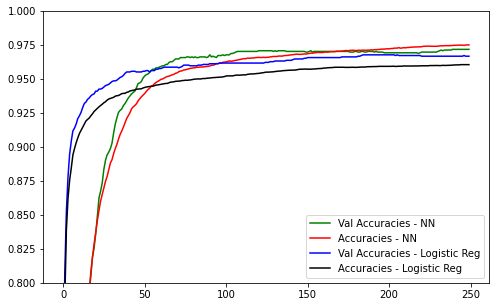

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

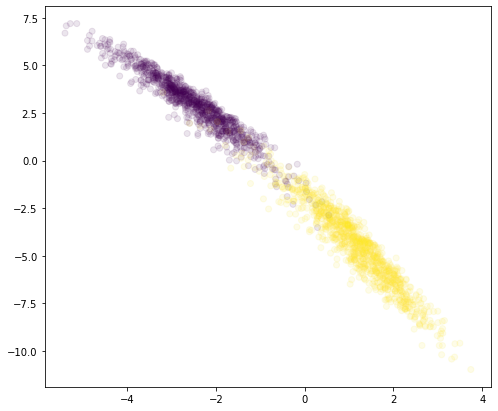

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

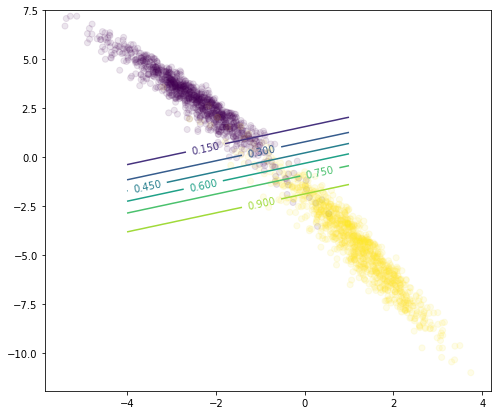

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );